<h1>FINANCIAL SERVICES USE IN TANZANIA
</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
sns.set()

<blockquote>
    <b>
        Examine the dataset. Are there any missing observations or columns where the data do not seem valid?
    </b>
    </blockquote>

In [2]:
df_mobilemoney= pd.read_csv('data/training.csv')
df_mobilemoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7094 non-null   int64  
 1   Q1                           7094 non-null   int64  
 2   Q2                           7094 non-null   int64  
 3   Q3                           7094 non-null   int64  
 4   Q4                           7094 non-null   int64  
 5   Q5                           7094 non-null   int64  
 6   Q6                           7094 non-null   int64  
 7   Q7                           7094 non-null   int64  
 8   Q8_1                         7094 non-null   int64  
 9   Q8_2                         7094 non-null   int64  
 10  Q8_3                         7094 non-null   int64  
 11  Q8_4                         7094 non-null   int64  
 12  Q8_5                         7094 non-null   int64  
 13  Q8_6              

In [3]:
df_mobilemoney['Q4'].value_counts()

3    3446
1    1199
2    1046
6     708
5     467
7     192
4      34
8       2
Name: Q4, dtype: int64

<blockquote>
           The column Q4 contains erroneous data, 8 is not a category. So in order to fix that, I will fill it with the mode Q4 value for the gender(Q2) of those individuals.
    </blockquote>

In [4]:
df_mobilemoney.Q4.replace(8,(df_mobilemoney[df_mobilemoney['Q2'] == 1].groupby('Q2')['Q4'].value_counts().index[0][1]),inplace=True)

In [5]:
print('\nNumber of missing values:',df_mobilemoney.isnull().sum().sum())


Number of missing values: 0


In [6]:
df_mobilemoney.drop('ID', axis=1, inplace=True)


<blockquote>
       We have a dataframe with 37 data columns and 7094 entries. I will rename these columns to make the data easier to read.  Then I'll change the values in the gender, marital_status, land_ownership, mobile_money_classification to make them easier to work with and visualise.
    
And then I'll create df_describe with all the categorical values filled in so that I can get the basic descriptive statistic for categorical and continuous values separately. The reason for this is also to maintain the other dataframe without all the categorical values filled in as my visualization relies on aggregation. I also dropped the ID column as it's not neccesary for anything that I'll be doing.
    </blockquote>

In [7]:
df_mobilemoney = df_mobilemoney.rename({'Q1': 'age', 'Q2': 'gender',
                                    'Q3':'marital_status', 'Q4':'highest_education',
                                    'Q5':'land_ownership', 'Q6':'title_deed',
                                    'Q7':'own_phone', 'Q8_1':'salaries_wages',
                                    'Q8_2':'selling_produce', 'Q8_3':'selling_services', 
                                    'Q8_4':'piece_job', 'Q8_5':'rental_income',
                                    'Q8_6':'interest','Q8_7':'pension',
                                    'Q8_8':'social_grant', 'Q8_9':'rely_on_someone',
                                    'Q8_10':'someone_pays', 'Q8_11':'other', 
                                    'Q9':'employment_type', 'Q10':'what_you_sell', 
                                    'Q11':'service_you_provide', 'Q12':'sent_money_in_12_months',
                                    'Q13':'last_time_sent_money','Q14':'recieved_money_in_12_months',
                                    'Q15':'when_last_recieved_money','Q16':'purchase_past_12_months',
                                    'Q17':'pay_bills_past_12_months','Q18':'literacy_Kiswhahili',
                                    'Q19':'literacy_english'}, axis='columns')

In [8]:
column_update = lambda column, dictionary: df_mobilemoney[column].replace(dictionary)

In [9]:
df_mobilemoney['gender'] = column_update('gender',{1: 'Male', 
                                                   2:'Female'})
df_mobilemoney['marital_status'] = column_update('marital_status',{1: 'Married', 
                                                                    2:'Divorced',
                                                                    3:'Widowed',
                                                                    4:'Single'})
df_mobilemoney['land_ownership'] = column_update('land_ownership',{1:'Personally own', 
                                                                2:'Own with someone',
                                                                3:'Household member owns',
                                                                4:'Land is rented',
                                                                5:'Don’t own',
                                                                6:'Don’t know'})
df_mobilemoney[['pay_bills_past_12_months','purchase_past_12_months']]=column_update(['pay_bills_past_12_months','purchase_past_12_months'],{-1:'N/A',
                                                                                                                                              1:'Never', 
                                                                                                                                              2:'Daily',
                                                                                                                                              3:'Weekly',
                                                                                                                                              4:'Monthly',
                                                                                                                                              5:'Less than monthly'})
df_mobilemoney['mobile_money_classification'] = column_update('mobile_money_classification',{0:'None', 
                                                                                             1:'Other',
                                                                                             2:'Mobile Money',
                                                                                             3:'Mobile Money +Other'})

<blockquote>
       I'm also going to add an age category column as this would make it easier to interpret the beaviour of different age groups
    </blockquote>

In [10]:
bins= [15, 17, 24, 35, 59, 100]
group_names= ['children <18', 'youth 18-24 ', 'young_adult 25-35', 'Middle_Age 36-59', 'Senior 60+']

df_mobilemoney['age_group']= pd.cut(df_mobilemoney.age, bins, labels= group_names).astype(object)

<blockquote>
    <b>
        Basic descriptive statistics for the dataset.
    </b>
    </blockquote>

In [11]:
df_describe = df_mobilemoney.copy()
df_describe[df_describe.columns.difference(['age', 'Latitude', 'Longitude'])]=(df_describe[df_describe.columns.difference(['age', 'Latitude', 'Longitude'])]).astype('object')
df_describe.describe(include='O').T

,count,unique,top,freq
gender,7094,2,Female,3972
marital_status,7094,4,Married,4548
highest_education,7094,7,3,3448
land_ownership,7094,6,Personally own,3002
title_deed,7094,2,2,5963
own_phone,7094,2,1,4271
salaries_wages,7094,2,0,6653
selling_produce,7094,2,1,4470
selling_services,7094,2,0,6682
piece_job,7094,2,0,4701


In [12]:
df_describe.describe(exclude='O')

,age,Latitude,Longitude
count,7094.000000,7094.000000,7094.000000
mean,38.239498,-6.034378,35.354029
std,16.332148,2.720888,2.899511
min,16.000000,-11.467463,29.639578
25%,25.000000,-8.275387,32.935429
50%,35.000000,-6.087854,35.073326
75%,48.000000,-3.517053,38.351815
max,100.000000,-1.084000,40.258744


In [13]:
def plot_graphs(column,x_axis,dataframe,title_prefix,colours=None,order=None):
    plt.figure(figsize = (12,7))
    sns.countplot(x = column, hue = x_axis, data = dataframe,order = order, palette=colours)
    plt.title(f'\n{title_prefix} {column.replace("_"," ")}\n',fontsize=20, weight='bold')
    plt.xlabel(f'\n{column.replace("_"," ")}', fontsize=20, weight='bold')
    plt.ylabel('no. of people', fontsize=20, weight='bold')
    plt.legend(loc='upper right')
    plt.show()

In [14]:
def plot_income_graphs(x_axis, dataframe):
    income = dataframe[['salaries_wages', 'selling_produce', 'selling_services', 'piece_job',
                      'rental_income', 'interest', 'pension', 'social_grant', 'rely_on_someone',
                      'someone_pays', 'other',x_axis
                     ]]
    income_types = income.groupby([x_axis]).sum()
    fig, axes = plt.subplots(figsize=(13, 7))
    income_types.plot(kind='bar', ax=axes, rot=0)
    plt.title(f'\nIncome Type and {x_axis.replace("_"," ")}\n', fontsize=20, weight='bold')
    plt.xlabel(f'{x_axis.replace("_"," ")}', fontsize=20, weight='bold')
    plt.ylabel('No. of People', fontsize=20, weight='bold')
    plt.show()

<blockquote>
    <b>
        Graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.
    </b>
    </blockquote>

<h2>Graphs looking at financial services accessed</h2>

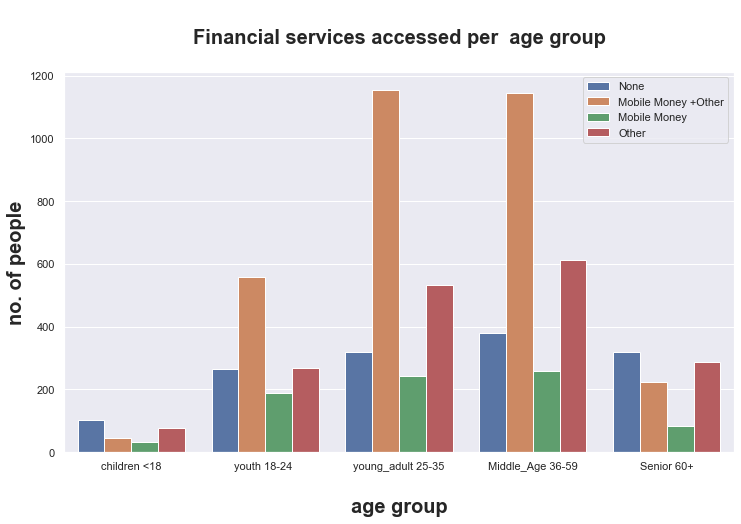

In [15]:
plot_graphs('age_group',
            'mobile_money_classification',
            df_mobilemoney,
             'Financial services accessed per ',
            order=['children <18', 'youth 18-24 ', 'young_adult 25-35', 'Middle_Age 36-59', 'Senior 60+'])

<blockquote>
    <li>Middle aged people followed by young adults and then youth make up most of the mobile money and other financial services customer base. Which makes sense as the people in these age groups are the ones who part take in the most economic activity in general.</li>
</blockquote>

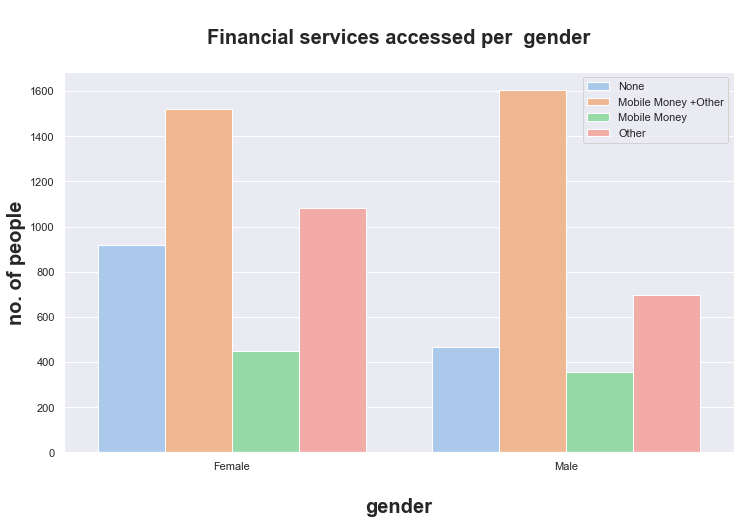

In [16]:
plot_graphs('gender', 
            'mobile_money_classification',
            df_mobilemoney,
             'Financial services accessed per ','pastel')

<blockquote>
    <li>Men are more likely to use mobile money with another financial service.</li>
    <li> More women use mobile money only or other financial services, although this could just be as a result of the dataset containing more women.</li>
</blockquote>

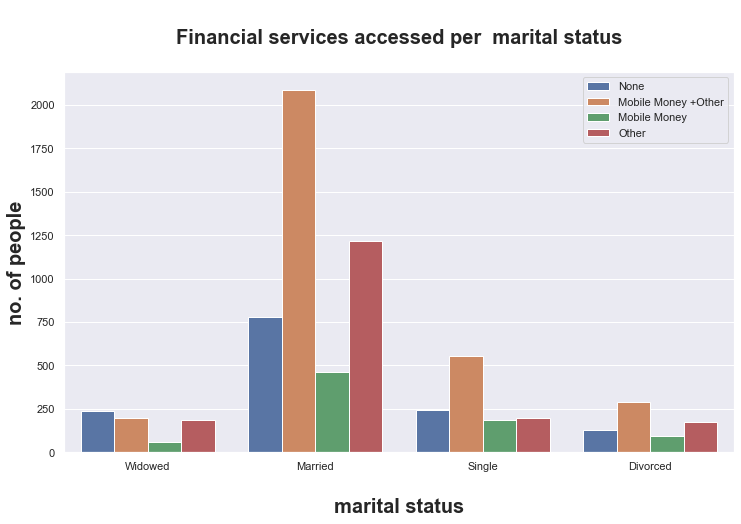

In [17]:
plot_graphs('marital_status', 
            'mobile_money_classification',
            df_mobilemoney,
             'Financial services accessed per ',)

<blockquote>
    <li>Married followed by single people use financial services the most. With widows and divorced not really using financial services.</li>
    <li>Married people make up the most of the mobile money customer base.</li>
</blockquote>

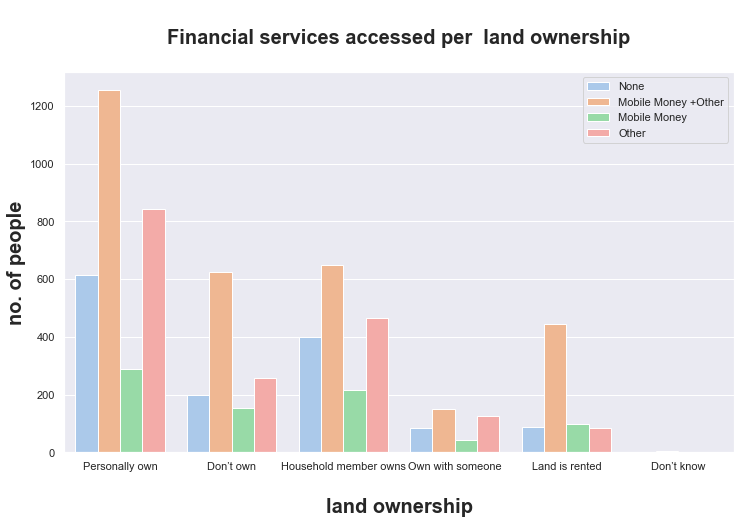

In [18]:
plot_graphs('land_ownership', 
            'mobile_money_classification',
            df_mobilemoney,
             'Financial services accessed per ','pastel')

<blockquote>
    <li>People who personally own land or has a household member who does are more likely to use financial services and mobile money.</li>
</blockquote>

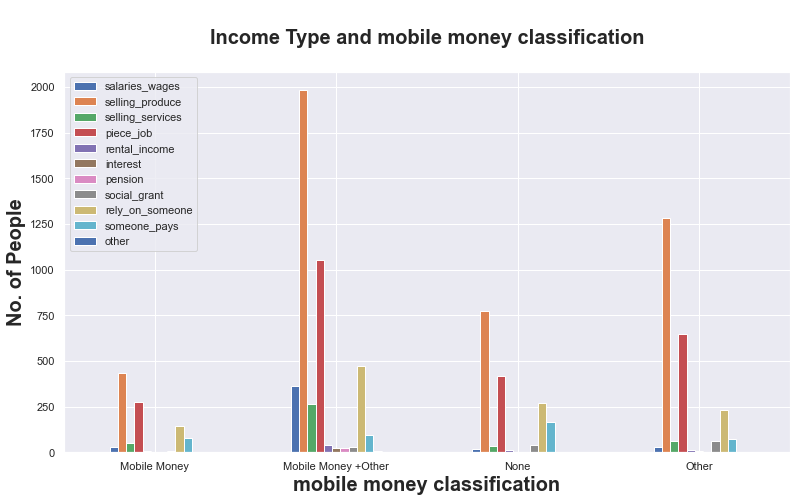

In [19]:
plot_income_graphs('mobile_money_classification',df_mobilemoney)

<blockquote>
    <li>People who sell produce or do piece jobs use mobile money and financial services the most.</li>
</blockquote>

<blockquote>
    <b>
        Graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.
    </b>
    </blockquote>

<h2>Graphs looking at how often mobile money was used to purchase in the past 12 months</h2>

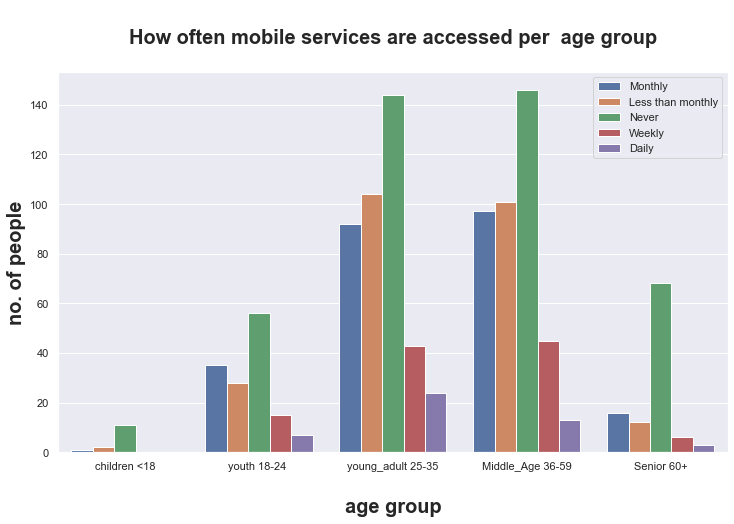

In [20]:
plot_graphs('age_group', 
            'purchase_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ',
           order=['children <18', 'youth 18-24 ', 'young_adult 25-35', 'Middle_Age 36-59', 'Senior 60+'])

<blockquote>
    <li>Middle aged people and young adults used mobile money the most often for purchases in past 12 months.</li>
    </blockquote>

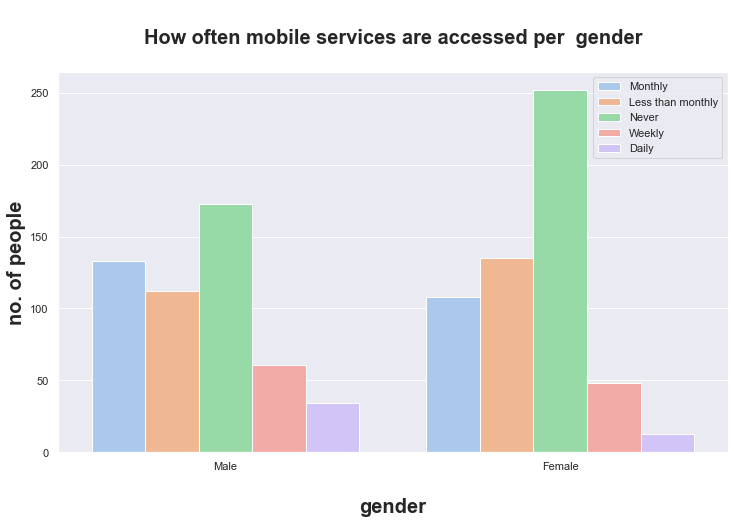

In [21]:
plot_graphs('gender', 
            'purchase_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ','pastel')

<blockquote>
    <li>Men used mobile money the most often for purchases in past 12 months.</li>
    </blockquote>

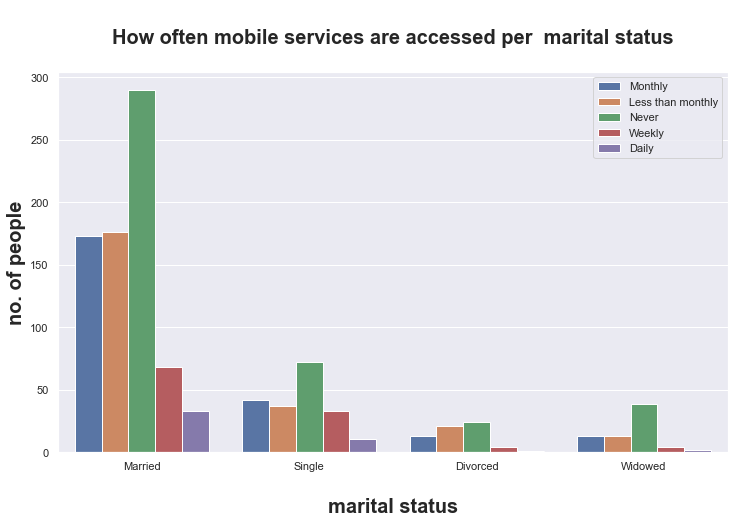

In [22]:
plot_graphs('marital_status', 
            'purchase_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ')

<blockquote>
    <li>Married people used mobile money the most often for purchases in past 12 months.</li>
    </blockquote>

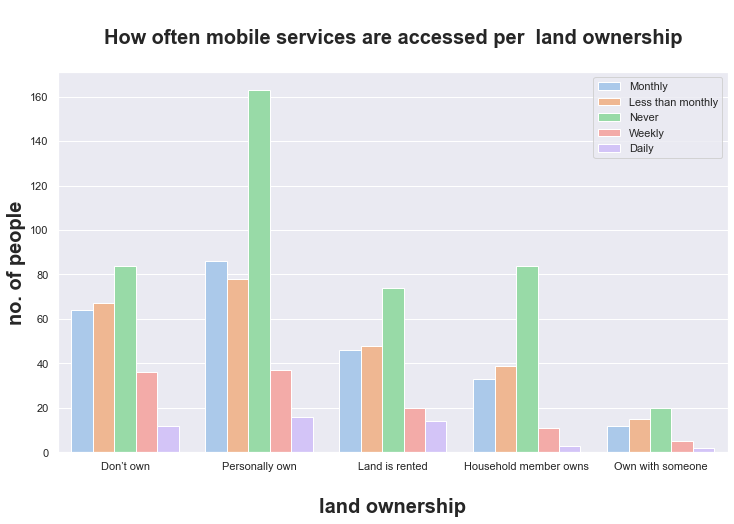

In [23]:
plot_graphs('land_ownership', 
            'purchase_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ','pastel')

<blockquote>
    <li>People who personally own land used mobile money the most often for purchases in past 12 months.</li>
    </blockquote>

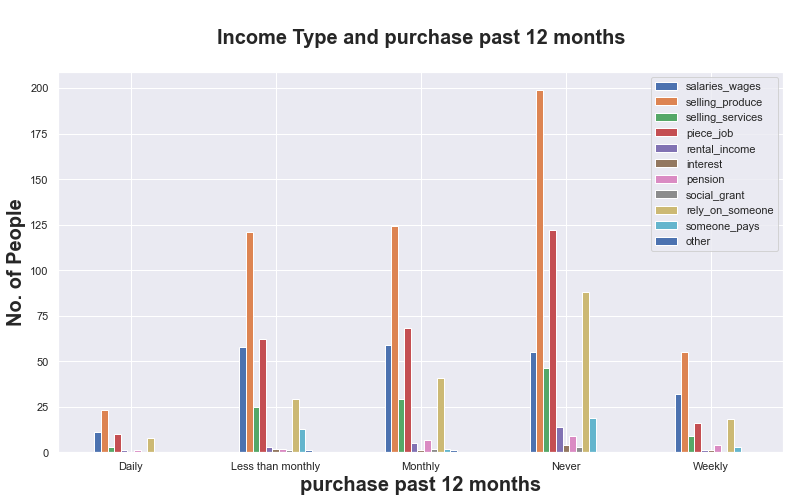

In [24]:
plot_income_graphs('purchase_past_12_months',df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'])

<blockquote>
    <li>People who sell produce or does piece jobs used mobile money the most often for purchases in past 12 months.</li>
    </blockquote>

<h2>Graphs looking at how often mobile money was used to pay bills in the past 12 months</h2>

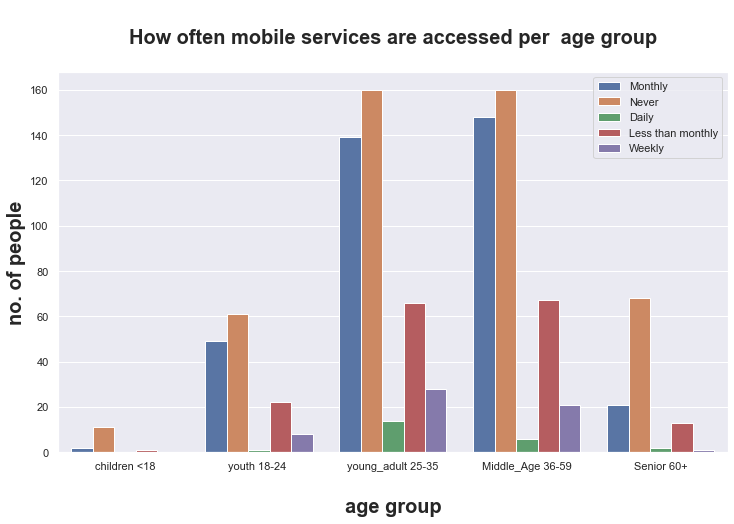

In [25]:
plot_graphs('age_group', 
            'pay_bills_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ',
           order=['children <18', 'youth 18-24 ', 'young_adult 25-35', 'Middle_Age 36-59', 'Senior 60+'])

<blockquote>
    <li>Middle aged people and young adults used mobile money the most often to pay bills in past 12 months.</li>
    </blockquote>

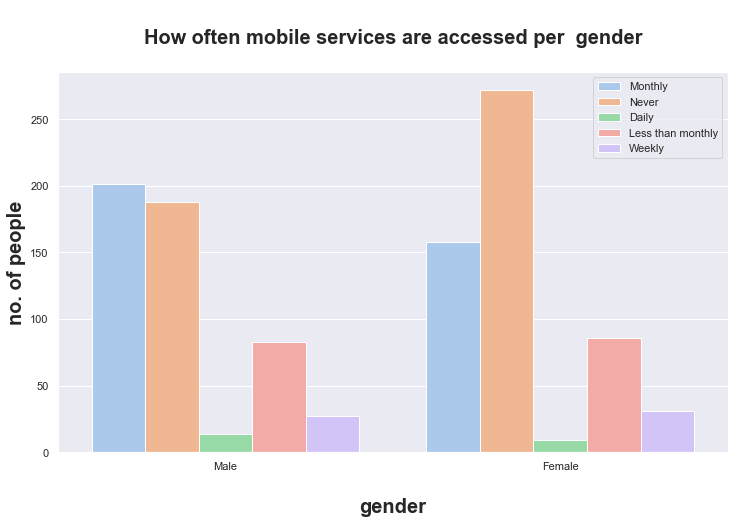

In [26]:
plot_graphs('gender', 
            'pay_bills_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ','pastel')

<blockquote>
    <li>Men used mobile money the most often to pay bills in past 12 months.</li>
    </blockquote>

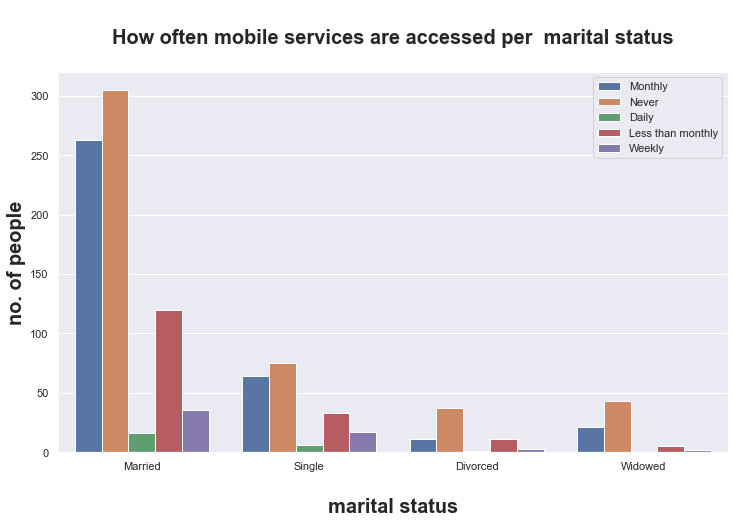

In [27]:
plot_graphs('marital_status', 
            'pay_bills_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ')

<blockquote>
    <li>Married people used mobile money the most often to pay bills in past 12 months.</li>
    </blockquote>

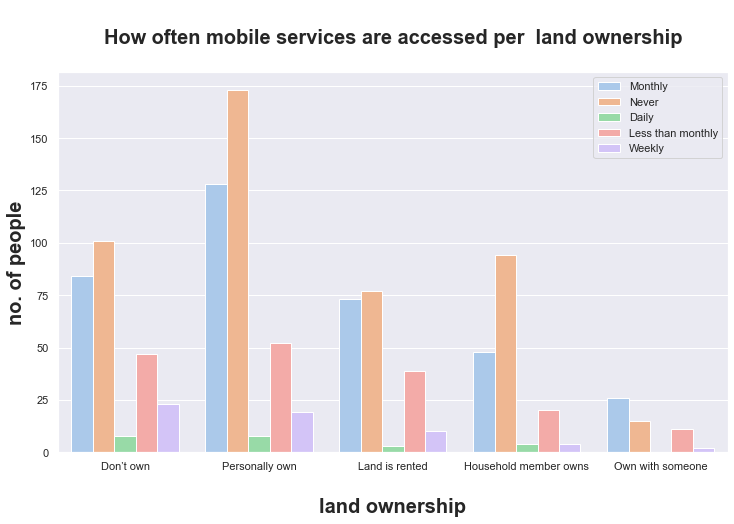

In [28]:
plot_graphs('land_ownership', 
            'pay_bills_past_12_months',
            df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'],
             'How often mobile services are accessed per ','pastel')

<blockquote>
    <li>People who personally own land used mobile money the most often to pay bills in past 12 months.</li>
    </blockquote>

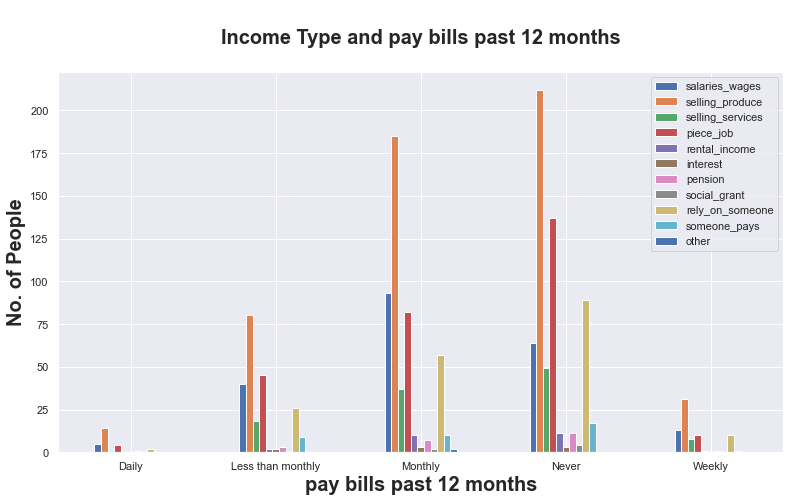

In [29]:
plot_income_graphs('pay_bills_past_12_months',df_mobilemoney[df_mobilemoney.pay_bills_past_12_months!='N/A'])

<blockquote>
    <li>People who sell produce or does piece jobs used mobile money the most often to pay bills in past 12 months.</li>
    </blockquote>

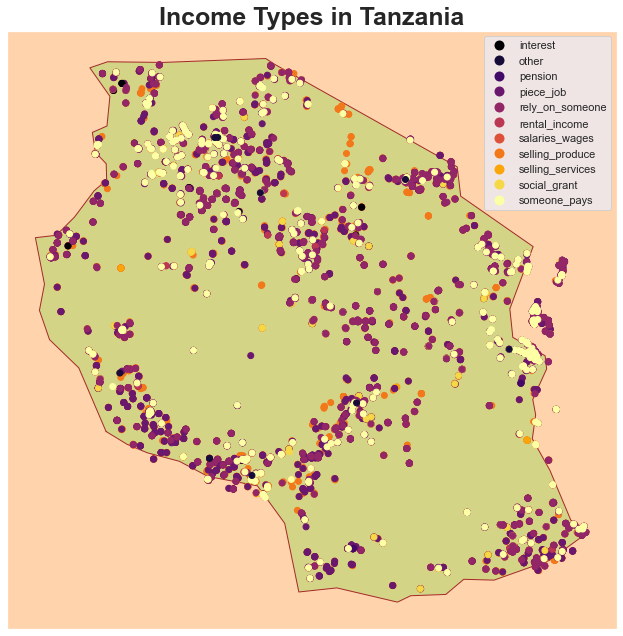

<Figure size 504x864 with 0 Axes>

In [30]:
df_mobilemoney_geo = gpd.GeoDataFrame(df_mobilemoney, geometry = 
                                        gpd.points_from_xy(df_mobilemoney.Longitude, df_mobilemoney.Latitude))
map_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mobilemoney_map = pd.melt(df_mobilemoney_geo, id_vars=['geometry'],
                           value_vars=['salaries_wages', 'selling_produce', 'selling_services', 'piece_job',
                      'rental_income', 'interest', 'pension', 'social_grant', 'rely_on_someone',
                      'someone_pays', 'other'], var_name='income')

map_filter = mobilemoney_map[mobilemoney_map['value'] == 1]
axis = map_data[map_data.name == 'Tanzania'].plot(color = '#d4d487', edgecolor='brown')
map_filter.plot(column= 'income', categorical=True, cmap='inferno', ax = axis, legend=True)
plt.title('Income Types in Tanzania', fontsize=25, weight='bold')
ax = plt.gca()
ax.grid(False)
plt.xticks([])
plt.yticks([])
ax.set_facecolor('#ffd4ad')
fig = plt.gcf()
fig.set_size_inches(15, 11)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.figure(figsize = (7,12))
plt.show()

<h2>Conclusion</h2>

<blockquote>
Men, people who are married are middle aged, young adults, own land, sell produce or do piece jobs make up majority of the mobile money customer base. However women are more likely to use mobile money only or other financial services. Most of the people in Tanzania earn a living from selling produce or do piece jobs. <li>Majority of the people in the dataset use mobile money in combination with another financial service. This could           tell us that mobile money doesn't offer them all of the features that they'd like so they have to supplement that with         an additional financial service.</li>
</blockquote>